# In Class Assignment - Logistic Regression & SVM

Researchers at Massachusetts Institute of Technology have recently developed a dataset for the prupose of data-driven design of a bicycle. In the long run, the goal is to use this dataset to train models that are capable of desgning bicycles based on given features. In this homework assignment, we try to use KNN method to classify the type of a given bicycle using the given features. There is a great video giving explanations regarding these researchers' work at https://www.youtube.com/watch?v=75GpGV6M8VU, which I encourage you to watch to get a better understandng of the dataset. Further, you can also find their published paper at https://decode.mit.edu/assets/papers/BIKED.pdf. Both the video and the paper provide information about how did they create the dataset and some of their modeling results.In this in-class assignment, we will be using the MIT dataset for the purpose of data-driven design of a bicycle. We worked with this dataset in our previous in class assignment.

This dataset includes 4512 manually-designed bicycle models span all common bicycle styles and feature unique models from remote corners of the bicycle design space. BIKED contains user-specified bicycle class data. Shown below is a plot of the parametric bicycle design space. Corresponding images from models in different regions of the embedding are showcased.

<img src="https://docs.google.com/uc?export=download&id=1tKmeqGxrdxBfI3LyoyBtXZe9CGvU-wZ8" width="800">



__(a)__ Import the dataset, which comes as a csv file with this assignment, and print the first five rows. How many rows do we have in this dataset?

In [3]:
# your code goes here
import pandas as pd
df = pd.read_csv("C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\Biked_Dataset_Reduced.csv")
df.head(5)
print("number of rows :")
print(df.shape[0])

number of rows :
4512


__(b)__ Print a list of all the unique styles in the dataset.
The styles are identified as `Bicycle_Model` variable. How many different type of styles do we have in this dataset?

In [4]:
# your code goes here
print("unique bicycle styles are", df['Bicycle_Model'].unique())
print("number of unique bicycle styles is", len(df['Bicycle_Model'].unique()))



unique bicycle styles are ['ROAD' 'DIRT_JUMP' 'POLO' 'BMX' 'MTB' 'TOURING' 'TRACK' 'CRUISER'
 'COMMUTER' 'CITY' 'CYCLOCROSS' 'OTHER' 'TRIALS' 'CHILDRENS' 'TIMETRIAL'
 'CARGO' 'HYBRID' 'GRAVEL' 'FAT']
number of unique bicycle styles is 19


__(c)__ Is the data balanced in terms of bicycle styles (models)? Which style has the most number of samples in the dataset? Which style has the least? How many of each style do we have?

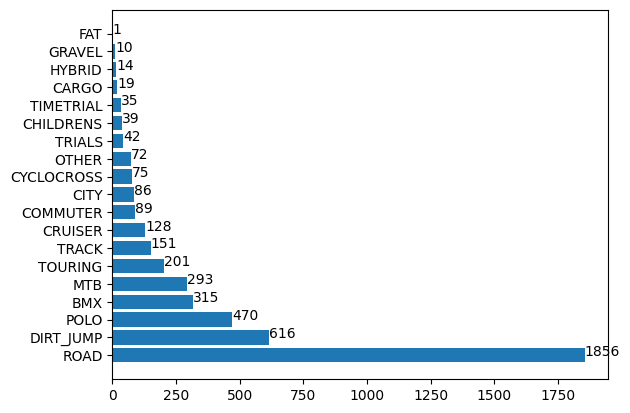

In [5]:
# your code goes here
import matplotlib.pyplot as plt
model_counts = df['Bicycle_Model'].value_counts()


#This referenced :
#https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/

x = df['Bicycle_Model'].unique()
y = df['Bicycle_Model'].value_counts()
plt.barh(x, y)
for index, value in enumerate(y):
	plt.text(value, index,
			str(value))
plt.show()


The dataset is not very balanced.

'Road' style bike has most data with 1856 entries, while FAT - the least common entry has only one. Entry count for each styles is shown as the bar graph  


__(d)__ Use all the features given in the dataset to develop a model for classifying the three most common bike styles. Use both logistic regression and SVM. Choose some values for hyper-parameters `C` and `gamma` for your SVM algorithm.

In [37]:
# your code goes here
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame to keep only the rows with the top three models
#Dividing DATA into training and testing
df_filtered = df[df['Bicycle_Model'].isin(df['Bicycle_Model'].value_counts().nlargest(3).index)]
df_filtered.head(5)
x_data = np.array(df_filtered.drop('Bicycle_Model', axis=1))
y_data = np.array(df_filtered['Bicycle_Model'])
x_data_scaled = MinMaxScaler().fit_transform(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.2, random_state=0)

#SVM model Dependencies
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # For normalization
import numpy as np


#Logistic Regression model Dependencies
from sklearn.linear_model import LogisticRegression

#Logistic Regression model 
lrM = LogisticRegression(max_iter=500)
lrM.fit(x_train, y_train)
yhatTest_LR = lrM.predict(x_test)
yhatTrain_LR = lrM.predict(x_train)


#SVM model
classifier = SVC(kernel = 'rbf', C = 0.1,gamma=30)
classifier.fit(x_train, y_train)
yhatTest_SVM = classifier.predict(x_test)
yhatTrain_SVM = classifier.predict(x_train)
classifier.classes_

c:\Users\tanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['MTB', 'ROAD', 'TRACK'], dtype=object)

__(e)__ Use evaluation metrics we covered in class (Jaccard Index and F-Score) to assess the performance of the model. Provide the confusion matrix for both training and test data. Provide a few lines explanations about the performance of your model based on the results of evaluation metrics and confusion matrices.

In [38]:
# your code goes here
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#LR MODEL
print('-'*20, 'LR MODEL', '-'*20)
acc_scoreTrain = accuracy_score(y_train,yhatTrain_LR)
acc_scoreTest = accuracy_score(y_test,yhatTest_LR)
print('accuracy for training data is %0.3f' %acc_scoreTrain)
print('accuracy for test data is %0.3f' %acc_scoreTest)
J_scoreTrain = jaccard_score(y_train,yhatTrain_LR, average='micro')
J_scoreTest = jaccard_score(y_test,yhatTest_LR, average='micro')
print('Jaccard Index for training data is %0.3f' %J_scoreTrain)
print('Jaccard Index for test data is %0.3f' %J_scoreTest)
F_scoreTrain = f1_score(y_train,yhatTrain_LR,average='micro')
F_scoreTest = f1_score(y_test,yhatTest_LR, average='micro')
print('F-Score for training data is %0.3f' %F_scoreTrain)
print('F-Score for test data is %0.3f' %F_scoreTest)
print('\n')
print('Confusion matrix for training data')
CM_scoreTrain = confusion_matrix(y_train,yhatTrain_LR)   # possible option normalize='true'
print(CM_scoreTrain)

print(40*'-')

print('Confusion matrix for test data')
CM_scoreTest = confusion_matrix(y_test,yhatTest_LR)   # possible option normalize='true'
print(CM_scoreTest)



#SVM MODEL
print('-'*20, 'SVM MODEL', '-'*20)
acc_scoreTrain = accuracy_score(y_train,yhatTrain_SVM)
acc_scoreTest = accuracy_score(y_test,yhatTest_SVM)
print('accuracy for training data is %0.3f' %acc_scoreTrain)
print('accuracy for test data is %0.3f' %acc_scoreTest)
J_scoreTrain = jaccard_score(y_train,yhatTrain_SVM, average='micro')
J_scoreTest = jaccard_score(y_test,yhatTest_SVM, average='micro')
print('Jaccard Index for training data is %0.3f' %J_scoreTrain)
print('Jaccard Index for test data is %0.3f' %J_scoreTest)
F_scoreTrain = f1_score(y_train,yhatTrain_SVM,average='micro')
F_scoreTest = f1_score(y_test,yhatTest_SVM, average='micro')
print('F-Score for training data is %0.3f' %F_scoreTrain)
print('F-Score for test data is %0.3f' %F_scoreTest)
print('\n')
print('Confusion matrix for training data')
CM_scoreTrain = confusion_matrix(y_train,yhatTrain_SVM)   # possible option normalize='true'
print(CM_scoreTrain)

print(40*'-')

print('Confusion matrix for test data')
CM_scoreTest = confusion_matrix(y_test,yhatTest_SVM)   # possible option normalize='true'
print(CM_scoreTest)

-------------------- LR MODEL --------------------
accuracy for training data is 0.991
accuracy for test data is 0.888
Jaccard Index for training data is 0.981
Jaccard Index for test data is 0.798
F-Score for training data is 0.991
F-Score for test data is 0.888


Confusion matrix for training data
[[ 509    9    0]
 [   2 1461    5]
 [   0    6  361]]
----------------------------------------
Confusion matrix for test data
[[ 90   8   0]
 [ 14 350  24]
 [  2  18  83]]
-------------------- SVM MODEL --------------------
accuracy for training data is 0.624
accuracy for test data is 0.659
Jaccard Index for training data is 0.453
Jaccard Index for test data is 0.491
F-Score for training data is 0.624
F-Score for test data is 0.659


Confusion matrix for training data
[[   0  518    0]
 [   0 1468    0]
 [   0  367    0]]
----------------------------------------
Confusion matrix for test data
[[  0  98   0]
 [  0 388   0]
 [  0 103   0]]


__(f)__ Change the values for hyper-parameters for the SVM algorithm to see if you can get better results.

In [ ]:
# your code goes here
